In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
df_house = pd.read_csv(r"Downloads/estat_earn_nt_net_filtered_en.csv/estat_earn_nt_net_filtered_en.csv")

In [3]:
df_hpi = pd.read_csv(r"Downloads/estat_prc_hpi_a_filtered_en.csv/estat_prc_hpi_a_filtered_en.csv")
df_hpi = df_hpi.drop(range(70, 100)).drop(range(120, 146))
df_hpi.head()

,DATAFLOW,LAST UPDATE,freq,purchase,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,CONF_STATUS
0,ESTAT:PRC_HPI_A(1.0),10/01/25 11:00:00,Annual,Total,"Annual average index, 2015=100",Austria,2014,94.68,NaN,NaN
1,ESTAT:PRC_HPI_A(1.0),10/01/25 11:00:00,Annual,Total,"Annual average index, 2015=100",Austria,2015,100.00,NaN,NaN
2,ESTAT:PRC_HPI_A(1.0),10/01/25 11:00:00,Annual,Total,"Annual average index, 2015=100",Austria,2016,106.71,NaN,NaN
3,ESTAT:PRC_HPI_A(1.0),10/01/25 11:00:00,Annual,Total,"Annual average index, 2015=100",Austria,2017,112.14,NaN,NaN
4,ESTAT:PRC_HPI_A(1.0),10/01/25 11:00:00,Annual,Total,"Annual average index, 2015=100",Austria,2018,118.83,NaN,NaN


In [4]:
df_inf = pd.read_csv(r"Downloads/estat_tec00118_filtered_en.csv/estat_tec00118_filtered_en.csv")
df_inf = df_inf.drop(range(88, 108)).drop(range(138, 148))
df_inf.head()

,DATAFLOW,LAST UPDATE,freq,unit,coicop,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,CONF_STATUS
0,ESTAT:TEC00118(1.0),24/02/25 11:00:00,Annual,Annual average rate of change,All-items HICP,Albania,2017,3.2,d,NaN
1,ESTAT:TEC00118(1.0),24/02/25 11:00:00,Annual,Annual average rate of change,All-items HICP,Albania,2018,1.8,d,NaN
2,ESTAT:TEC00118(1.0),24/02/25 11:00:00,Annual,Annual average rate of change,All-items HICP,Albania,2019,1.7,d,NaN
3,ESTAT:TEC00118(1.0),24/02/25 11:00:00,Annual,Annual average rate of change,All-items HICP,Albania,2020,2.2,d,NaN
4,ESTAT:TEC00118(1.0),24/02/25 11:00:00,Annual,Annual average rate of change,All-items HICP,Albania,2021,2.3,d,NaN


In [5]:
df_house = df_house.drop(range(69, 87)).drop(range(112, 133))
df_house.head()

,DATAFLOW,LAST UPDATE,freq,currency,estruct,ecase,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,CONF_STATUS
0,ESTAT:EARN_NT_NET(1.0),07/01/25 23:00:00,Annual,Euro,Net earning,Single person without children earning 50% of ...,Austria,2015,16832.55,NaN,NaN
1,ESTAT:EARN_NT_NET(1.0),07/01/25 23:00:00,Annual,Euro,Net earning,Single person without children earning 50% of ...,Austria,2016,17605.87,NaN,NaN
2,ESTAT:EARN_NT_NET(1.0),07/01/25 23:00:00,Annual,Euro,Net earning,Single person without children earning 50% of ...,Austria,2017,18080.86,NaN,NaN
3,ESTAT:EARN_NT_NET(1.0),07/01/25 23:00:00,Annual,Euro,Net earning,Single person without children earning 50% of ...,Austria,2018,18428.13,NaN,NaN
4,ESTAT:EARN_NT_NET(1.0),07/01/25 23:00:00,Annual,Euro,Net earning,Single person without children earning 50% of ...,Austria,2019,19042.15,NaN,NaN


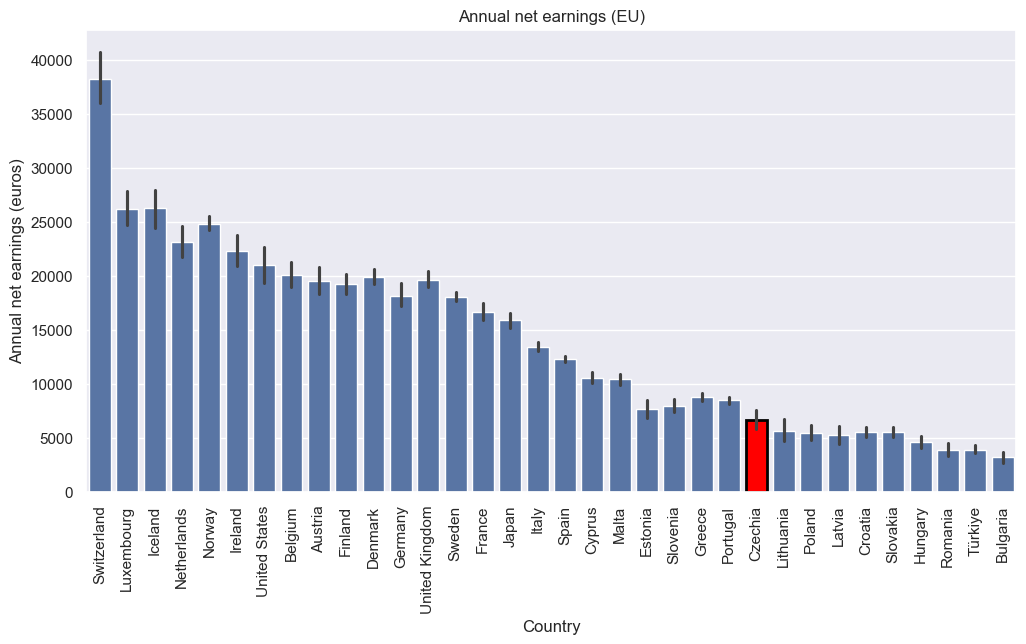

In [6]:
# Create the bar chart
plt.figure(figsize=(12, 6))
bars = sns.barplot(x='geo', y='OBS_VALUE', data=df_house.sort_values('OBS_VALUE', ascending=False))

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Annual net earnings (euros)')
plt.title('Annual net earnings (EU)')

# Highlight a specific bar
highlight_index = 24  # Index of the bar you want to highlight (0-based)
highlight_bar = bars.patches[highlight_index]
highlight_bar.set_facecolor('red')
highlight_bar.set_linewidth(2)
highlight_bar.set_edgecolor('black')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [7]:
czechia_max = df_house[(df_house['geo'] == 'Czechia') & (df_house['TIME_PERIOD'] == 2023)]
czechia_max = czechia_max['OBS_VALUE'].values[0]
czechia_2023 = czechia_max*25/12*2
print(f"The average OBS_VALUE for Czechia on 2023 is: {czechia_2023:.2f}")
#
czechia_min = df_house[(df_house['geo'] == 'Czechia') & (df_house['TIME_PERIOD'] == 2015)]
# Get the 'OBS_VALUE' for that row
czechia_2015 = czechia_min['OBS_VALUE'].values[0]
czechia_2015 = czechia_2023 - czechia_2015*25/12*2 
print(f"The average OBS_VALUE for Czechia on 2015 is: {czechia_2015:.2f}")
percentage_increase = (czechia_2023 - czechia_2015) / czechia_2015 * 100
print(f"The percentage increase in the average monthly gross income for Czechia from 2015 to 2023 is: {percentage_increase:.2f}%")

The average OBS_VALUE for Czechia on 2023 is: 38443.42
The average OBS_VALUE for Czechia on 2015 is: 17760.42
The percentage increase in the average monthly gross income for Czechia from 2015 to 2023 is: 116.46%


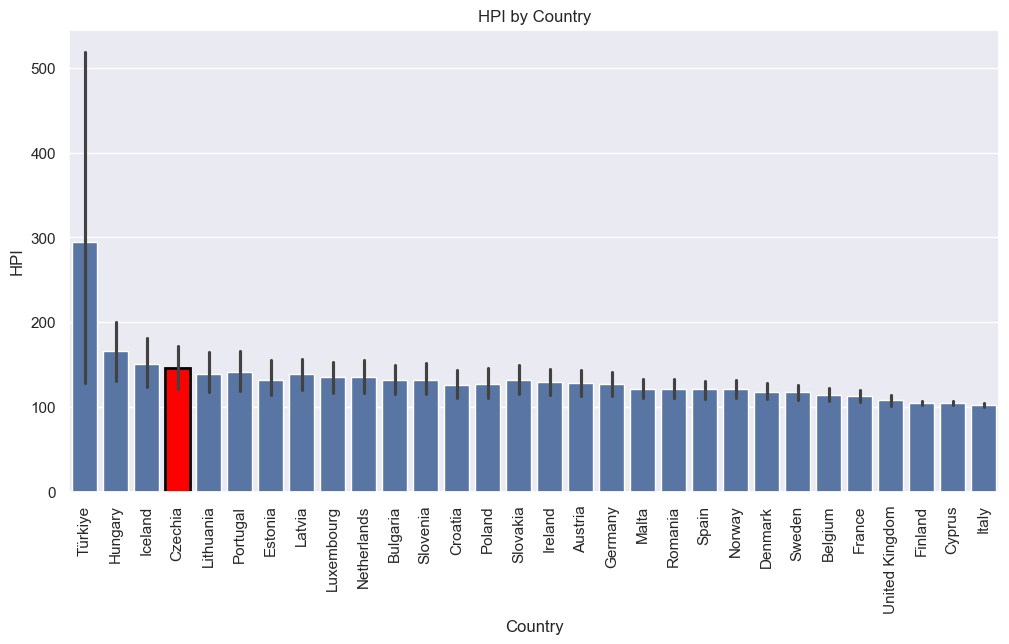

In [8]:
# Create the bar chart
plt.figure(figsize=(12, 6))
bars = sns.barplot(x='geo', y='OBS_VALUE', data=df_hpi.sort_values('OBS_VALUE', ascending=False))

# Add labels and title
plt.xlabel('Country')
plt.ylabel('HPI')
plt.title('HPI by Country')

# Highlight a specific bar
highlight_index = 3  # Index of the bar you want to highlight (0-based)
highlight_bar = bars.patches[highlight_index]
highlight_bar.set_facecolor('red')
highlight_bar.set_linewidth(2)
highlight_bar.set_edgecolor('black')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [9]:
czechia_2023 = df_hpi[(df_hpi['geo'] == 'Czechia') & (df_hpi['TIME_PERIOD'] == 2023)]

# Get the 'OBS_VALUE' for that row
czechia_2023_obs_value = czechia_2023['OBS_VALUE'].values[0]

print(f"The HPI for Czechia in 2023 is: {czechia_2023_obs_value}")
print("\nThis means that, on average, house prices in that country or region have increased by 111.7% between 2015 and 2023.")

The HPI for Czechia in 2023 is: 211.7

This means that, on average, house prices in that country or region have increased by 111.7% between 2015 and 2023.


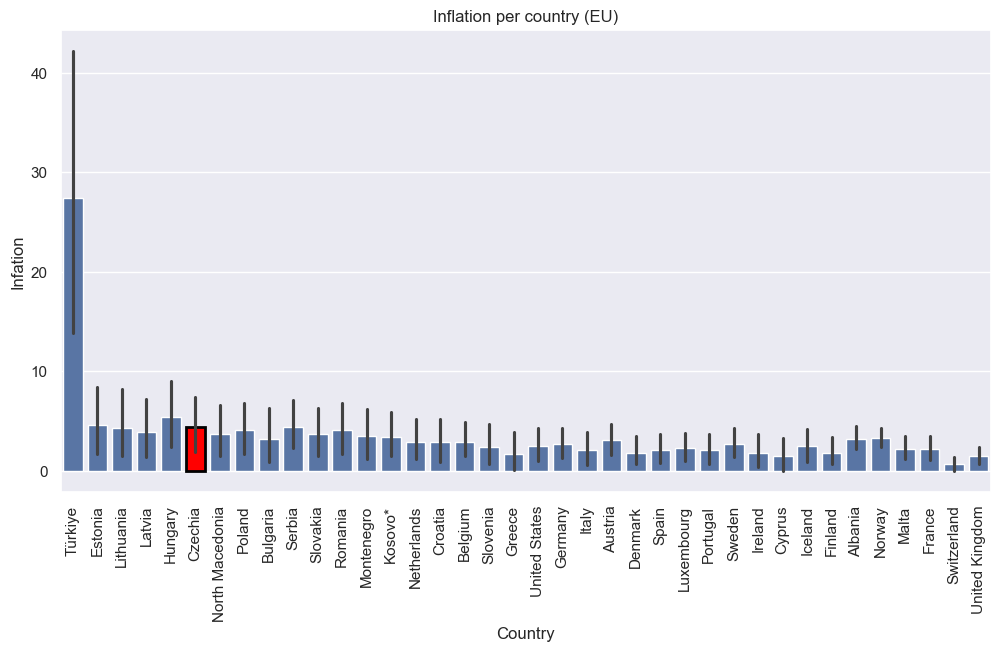

In [10]:
# Create the bar chart
plt.figure(figsize=(12, 6))
bars = sns.barplot(x='geo', y='OBS_VALUE', data=df_inf.sort_values('OBS_VALUE', ascending=False))

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Infation')
plt.title('Inflation per country (EU)')

# Highlight a specific bar
highlight_index = 5  # Index of the bar you want to highlight (0-based)
highlight_bar = bars.patches[highlight_index]
highlight_bar.set_facecolor('red')
highlight_bar.set_linewidth(2)
highlight_bar.set_edgecolor('black')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [11]:
czechia_inflation = df_inf[df_inf['geo'] == 'Czechia']

# Filter the data to get the inflation rates from 2015 to 2024
inflation_rates = czechia_inflation[(czechia_inflation['TIME_PERIOD'] >= 2015) & (czechia_inflation['TIME_PERIOD'] <= 2024)]['OBS_VALUE'].tolist()

# Calculate the cumulative inflation
cumulative_inflation = 1.0
for rate in inflation_rates:
    cumulative_inflation *= (1 + rate
                             / 100)

print(f"The cumulative inflation for Czechia from 2015 to 2024 is: {cumulative_inflation:.2f}")
print("\nThis means that the overall price level has increased by 52% from 2015 to 2024 due to the accumulated inflation.")

The cumulative inflation for Czechia from 2015 to 2024 is: 1.52

This means that the overall price level has increased by 52% from 2015 to 2024 due to the accumulated inflation.
